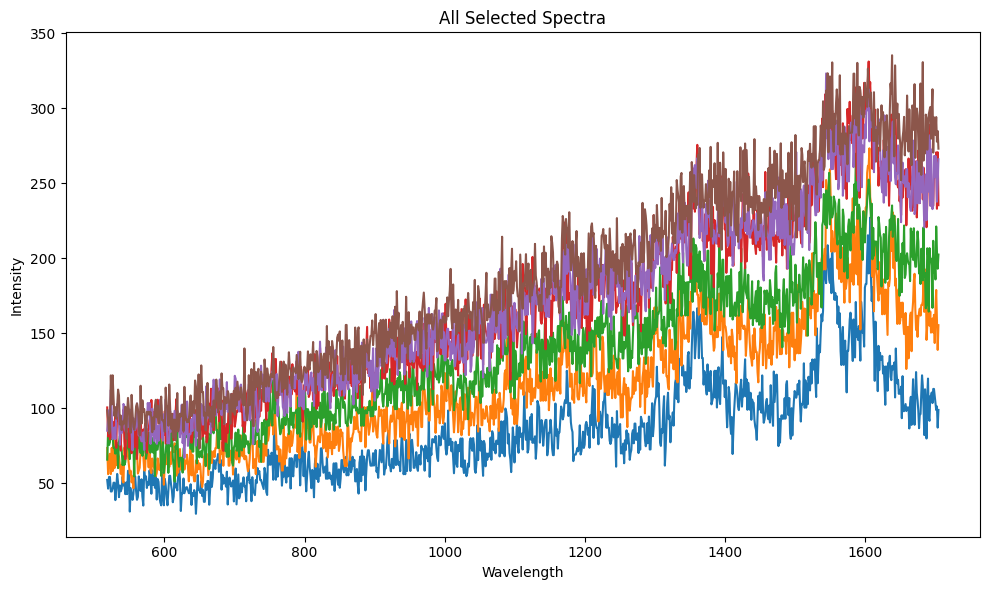

In [1]:
# PLOT ALL SPECTRUM
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.read_csv('/kaggle/input/malaria/malaria.csv')

# Initialize variables
spectra = []           # Store individual spectra
current_spectrum = []  # Store current spectrum

# Define number of spectra to extract
num_spectra_to_extract = 6

# Iterate through data
for index, row in data.iterrows():

    # Check if wave value indicates start of new spectrum
    if row['#Wave'] == 1705.003906:

        # If it is not the first spectrum, add current_spectrum to list
        if current_spectrum:
            spectra.append(current_spectrum)
            current_spectrum = []  # Reset the current spectrum

        # If is collected  desired number of spectra, break the loop
        if len(spectra) == num_spectra_to_extract:
            break

    # Append the current row to the current_spectrum
    current_spectrum.append(row)

# Append the last spectrum
if current_spectrum:
    spectra.append(current_spectrum)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot all the selected spectra
for spectrum in spectra:
    wave_values = [row['#Wave'] for row in spectrum]
    intensity_values = [row['#Intensity'] for row in spectrum]
    ax.plot(wave_values, intensity_values, label='Selected Spectra')

# Set plot titles & labels
ax.set_title('All Selected Spectra')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Intensity')

# Show the plot
plt.tight_layout()
plt.show()

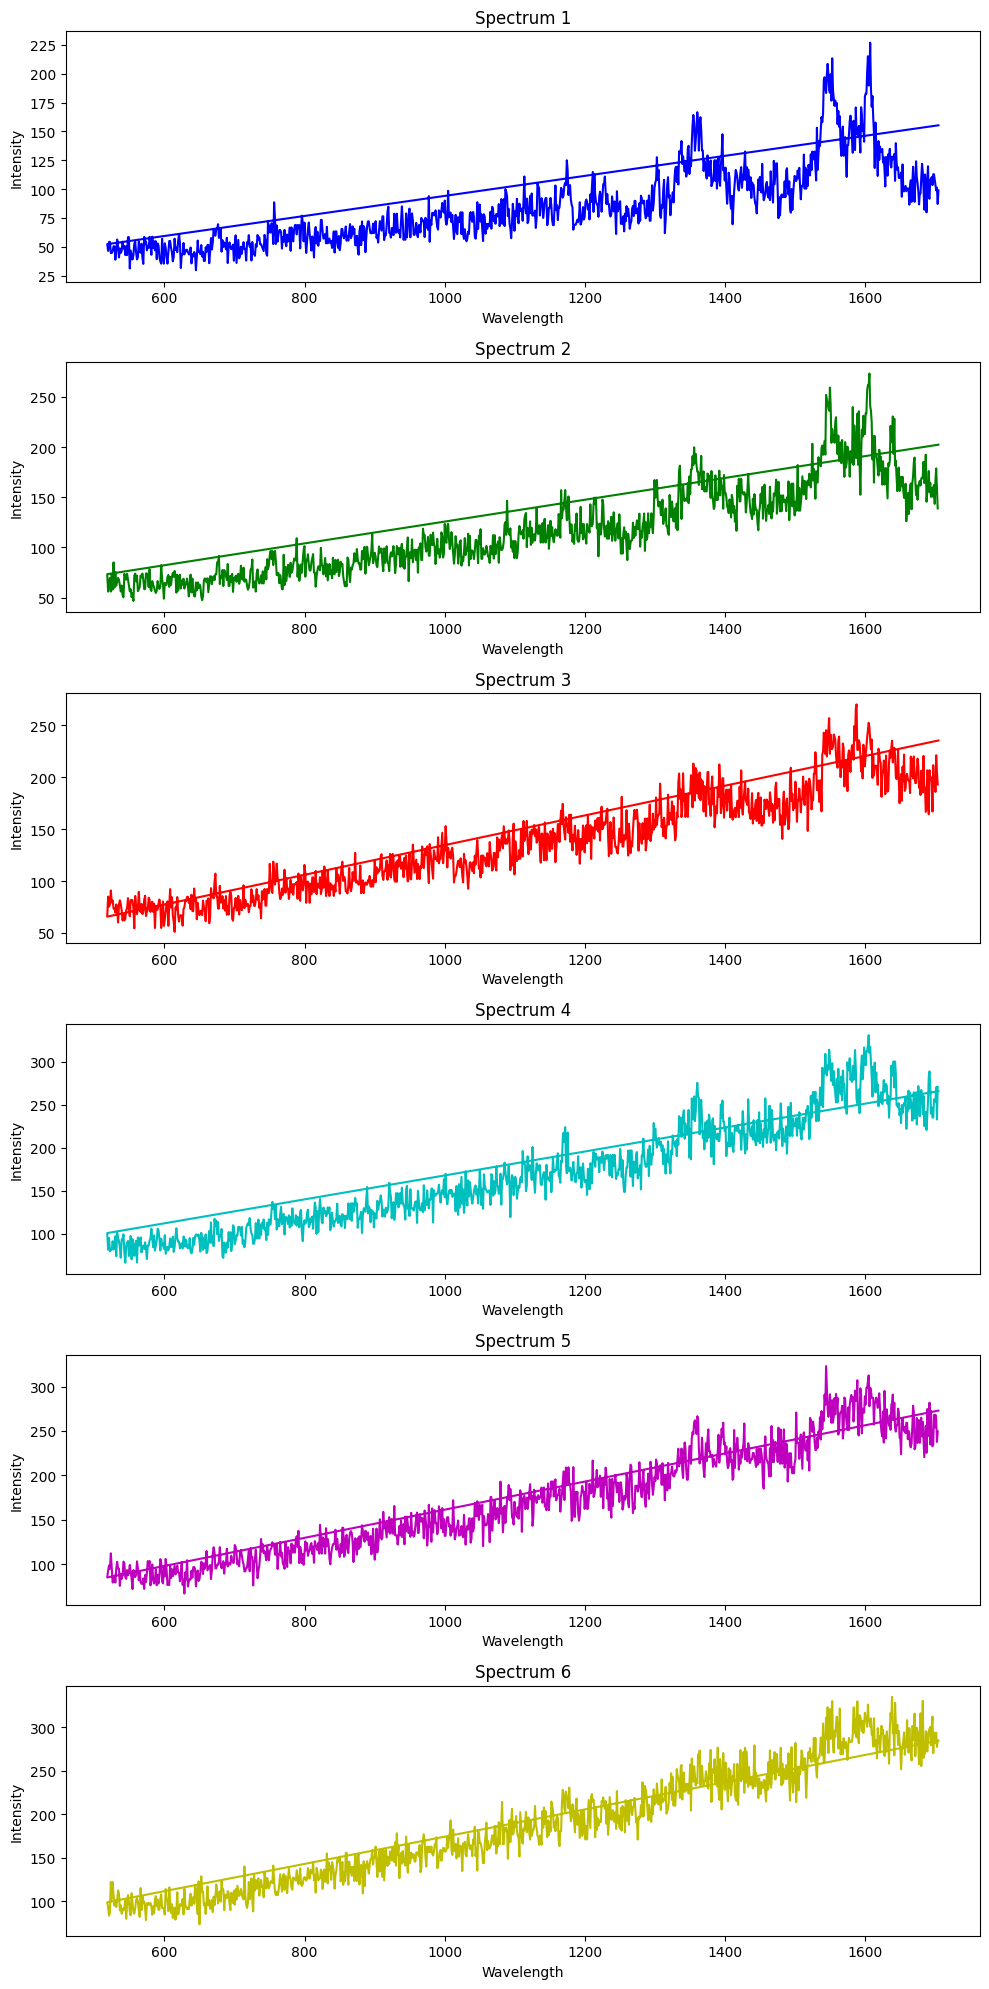

In [2]:
# PLOT EXTRACTED SPECTRUM
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.read_csv('/kaggle/input/malaria/malaria.csv')

# Initialize variables
selected_spectra = []  # store selected spectra
current_spectrum = []  # store current spectrum
num_spectra_to_extract = 6  # consecutive spectra to extract

# Iterate through data & collect 6 consecutive spectra
for index, row in data.iterrows():
    current_spectrum.append(row)
    
    if len(current_spectrum) > 1 and row['#Wave'] == 1705.003906:
        selected_spectra.append(pd.DataFrame(current_spectrum))  # Convert to DataFrame
        current_spectrum = []

    if len(selected_spectra) == num_spectra_to_extract:
        break

# Append last spectrum
if current_spectrum:
    selected_spectra.append(pd.DataFrame(current_spectrum))  # Convert to DataFrame

# Create subplots to visualize selected spectra
fig, ax = plt.subplots(num_spectra_to_extract, figsize=(10, 20))

# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each selected spectrum
for i in range(num_spectra_to_extract):
    spectrum = selected_spectra[i]
    ax[i].plot(spectrum['#Wave'], spectrum['#Intensity'], color=colors[i])
    ax[i].set_title(f'Spectrum {i + 1}')
    ax[i].set_xlabel('Wavelength')
    ax[i].set_ylabel('Intensity')

plt.tight_layout()
plt.show()